In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import rpy2.rinterface_lib.callbacks
import logging
import scrublet as scr
from rpy2.robjects import pandas2ri
import anndata2ri

In [2]:
# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

# Automatically convert rpy2 outputs to pandas dataframes
pandas2ri.activate()
anndata2ri.activate()
%load_ext rpy2.ipython

plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3
#sc.set_figure_params(dpi=200, dpi_save=300)
sc.logging.print_header()

scanpy==1.7.2 anndata==0.7.6 umap==0.5.1 numpy==1.19.5 scipy==1.6.3 pandas==1.2.4 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.1 louvain==0.7.0


In [3]:
%%R
# Load libraries from correct lib Paths for my environment - ignore this!
.libPaths("/home/spuccio/anaconda3/envs/singlecell/lib/R/library/")

library(clustree)


In [4]:
path = "/mnt/lugli/spuccio/SP028_Autoimmunity/Cariplo/IBD_counts/h5files"
Ptz_5_Ileum_Involved = sc.read("/".join([path,"Ptz_5_Ileum_Involved.h5ad"]))
Ptz_5_Ileum_Uninvolved = sc.read("/".join([path,"Ptz_5_Ileum_Uninvolved.h5ad"]))
# Ptz_5_Blood = sc.read("/".join([path,"Ptz_5_Blood.h5ad"]))
Ptz_7_Ileum_Involved = sc.read("/".join([path,"Ptz_7_Ileum_Involved.h5ad"]))
Ptz_7_Ileum_Uninvolved = sc.read("/".join([path,"Ptz_7_Ileum_Uninvolved.h5ad"]))
# Ptz_7_Blood = sc.read("/".join([path,"Ptz_7_Blood.h5ad"]))
Ptz_8_Ileum_Involved = sc.read("/".join([path,"Ptz_8_Ileum_Involved.h5ad"]))
Ptz_8_Ileum_Uninvolved = sc.read("/".join([path,"Ptz_8_Ileum_Uninvolved.h5ad"]))
# Ptz_8_Blood = sc.read("/".join([path,"Ptz_8_Blood.h5ad"]))
Ptz_10_Ileum_Involved = sc.read("/".join([path,"Ptz_10_Ileum_Involved.h5ad"])) 
Ptz_10_Ileum_Uninvolved = sc.read("/".join([path,"Ptz_10_Ileum_Uninvolved.h5ad"]))
# Ptz_10_Blood = sc.read("/".join([path,"Ptz_10_Blood.h5ad"]))
Ptz_11_Ileum_Involved = sc.read("/".join([path,"Ptz_11_Ileum_Involved.h5ad"])) 
Ptz_11_Ileum_Uninvolved = sc.read("/".join([path,"Ptz_11_Ileum_Uninvolved.h5ad"]))
# Ptz_11_Blood = sc.read("/".join([path,"Ptz_11_Blood.h5ad"]))
Ptz_12_Ileum_Involved = sc.read("/".join([path,"Ptz_12_Ileum_Involved.h5ad"])) 
Ptz_12_Ileum_Uninvolved = sc.read("/".join([path,"Ptz_12_Ileum_Uninvolved.h5ad"])) 
# Ptz_12_Blood = sc.read("/".join([path,"Ptz_12_Blood.h5ad"])) 
Ptz_13_Ileum_Involved = sc.read("/".join([path,"Ptz_13_Ileum_Involved.h5ad"])) 
Ptz_13_Ileum_Uninvolved = sc.read("/".join([path,"Ptz_13_Ileum_Uninvolved.h5ad"])) 
Ptz_14_Ileum_Involved = sc.read("/".join([path,"Ptz_14_Ileum_Involved.h5ad"])) 
Ptz_14_Ileum_Uninvolved = sc.read("/".join([path,"Ptz_14_Ileum_Uninvolved.h5ad"]))
# Ptz_14_Blood = sc.read("/".join([path,"Ptz_14_Blood.h5ad"]))
Ptz_15_Ileum_Involved = sc.read("/".join([path,"Ptz_15_Ileum_Involved.h5ad"]))
Ptz_15_Ileum_Uninvolved = sc.read("/".join([path,"Ptz_15_Ileum_Uninvolved.h5ad"])) 
# Ptz_15_Blood= sc.read("/".join([path,"Ptz_15_Blood.h5ad"]))
Ptz_16_Ileum_Involved = sc.read("/".join([path,"Ptz_16_Ileum_Involved.h5ad"]))
Ptz_16_Ileum_Uninvolved = sc.read("/".join([path,"Ptz_16_Ileum_Uninvolved.h5ad"]))

In [5]:
path = "/mnt/lugli/spuccio/SP028_Autoimmunity/Cariplo/CROHN_counts/h5files"
PTZ_1818_LP_Uninvolved = sc.read("/".join([path,"PTZ_1818_LP_Uninvolved.h5ad"]))
PTZ_1818_LP_Involved = sc.read("/".join([path,"PTZ_1818_LP_Involved.h5ad"]))
PTZ_1813_IEL_Uninvolved = sc.read("/".join([path,"PTZ_1813_IEL_Uninvolved.h5ad"]))
PTZ_1813_LP_Uninvolved = sc.read("/".join([path,"PTZ_1813_LP_Uninvolved.h5ad"]))
PTZ_1813_LP_Involved = sc.read("/".join([path,"PTZ_1813_LP_Involved.h5ad"]))
PTZ_1813_IEL_Involved = sc.read("/".join([path,"PTZ_1813_IEL_Involved.h5ad"]))
Ptz_1425_IEL_Normal = sc.read("/".join([path,"Ptz_1425_IEL_Normal.h5ad"]))
Ptz_1425_LP_Normal = sc.read("/".join([path,"Ptz_1425_LP_Normal.h5ad"]))
Ptz_7420_IEL_Normal= sc.read("/".join([path,"Ptz_7420_IEL_Normal.h5ad"]))
Ptz_7420_LP_Normal = sc.read("/".join([path,"Ptz_7420_LP_Normal.h5ad"])) 

## Import CRC dataset

In [6]:
path_crc="/mnt/lugli/spuccio/SP028_Autoimmunity/Cariplo/CRC_counts/"
adata_crc = sc.read_10x_mtx(path_crc)
Metadata_crc = pd.read_csv("/mnt/lugli/spuccio/SP028_Autoimmunity/Cariplo/CRC_metadata.csv",header=0,low_memory=False)
adata_crc.obs['CellId'] = Metadata_crc["Cell"].to_list()
adata_crc.obs['CellFromTumor'] = Metadata_crc["CellFromTumor"].to_list()
adata_crc.obs['PatientNumber'] = Metadata_crc["PatientNumber"].to_list()
adata_crc.obs['TumorType'] = Metadata_crc["TumorType"].to_list()
adata_crc.obs['TumorSite'] = Metadata_crc["TumorSite"].to_list()
adata_crc.obs['CellType'] = Metadata_crc["CellType"].to_list()
adata_crc.obs['dataset'] = 'E-MTAB-8107'

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


In [7]:
adata_crc = adata_crc[adata_crc.obs['CellType'] == "T_cell"]

In [8]:
adata_crc.obs['CellFromTumor'] = "Tumor"

Trying to set attribute `.obs` of view, copying.


In [11]:
adata = Ptz_5_Ileum_Involved.concatenate(Ptz_5_Ileum_Uninvolved,
                              Ptz_7_Ileum_Involved,Ptz_7_Ileum_Uninvolved,
                              Ptz_8_Ileum_Involved,Ptz_8_Ileum_Uninvolved,
                              Ptz_10_Ileum_Involved,Ptz_10_Ileum_Uninvolved,
                              Ptz_11_Ileum_Involved,Ptz_11_Ileum_Uninvolved,
                              Ptz_12_Ileum_Involved,Ptz_12_Ileum_Uninvolved,
                              Ptz_13_Ileum_Involved,Ptz_13_Ileum_Uninvolved,
                              Ptz_14_Ileum_Involved,Ptz_14_Ileum_Uninvolved,
                              Ptz_15_Ileum_Involved,Ptz_15_Ileum_Uninvolved,
                              Ptz_16_Ileum_Involved,Ptz_16_Ileum_Uninvolved,PTZ_1818_LP_Involved,
                                            PTZ_1813_IEL_Uninvolved,
                                            PTZ_1813_LP_Uninvolved,
                                            PTZ_1813_LP_Involved,
                                            PTZ_1813_IEL_Involved,
                                            Ptz_1425_IEL_Normal,
                                            Ptz_1425_LP_Normal,
                                            Ptz_7420_IEL_Normal,
                                            Ptz_7420_LP_Normal,
                                        PTZ_1818_LP_Uninvolved)

In [14]:
adata.

<14803246x33694 sparse matrix of type '<class 'numpy.float32'>'
	with 165121314 stored elements in Compressed Sparse Row format>

In [15]:
print(adata.obs['PatientNumber'].value_counts())

Ptz10       1474560
Ptz5        1474560
Ptz12       1474560
Ptz7        1474560
Ptz13       1474560
Ptz8        1474560
Ptz16       1474560
Ptz14       1474560
Ptz15       1474560
Ptz11       1474560
Ptz_1813      33839
Ptz_7420      14327
Ptz_1425       9480
Name: PatientNumber, dtype: int64


In [16]:
# mitochondrial genes
adata.var['mt'] = adata.var_names.str.startswith('MT-') 
# ribosomal genes
adata.var['ribo'] = adata.var_names.str.startswith(("RPS","RPL"))
# hemoglobin genes.
adata.var['hb'] = adata.var_names.str.contains(("^HB[^(P)]"))

adata.var

,gene_ids,mt,ribo,hb
RP11-34P13.3,ENSG00000243485,False,False,False
FAM138A,ENSG00000237613,False,False,False
OR4F5,ENSG00000186092,False,False,False
RP11-34P13.7,ENSG00000238009,False,False,False
RP11-34P13.8,ENSG00000239945,False,False,False
...,...,...,...,...
AC233755.2,ENSG00000277856,False,False,False
AC233755.1,ENSG00000275063,False,False,False
AC240274.1,ENSG00000271254,False,False,False
AC213203.1,ENSG00000277475,False,False,False


In [17]:
adata.var['mt'].value_counts()

False    33681
True        13
Name: mt, dtype: int64

In [18]:
adata.var['ribo'].value_counts()

False    33591
True       103
Name: ribo, dtype: int64

In [19]:
adata.var['hb'].value_counts()

False    33682
True        12
Name: hb, dtype: int64

### QC metrics

In [20]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt','ribo','hb'], percent_top=None, log1p=False, inplace=True)

In [21]:
print(adata.n_obs, adata.n_vars)

14803246 33694


In [22]:
mito_genes = adata.var_names.str.startswith('MT-')
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['percent_mt2'] = np.sum(
    adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

<ipython-input-22-77517b1029b1>:4: RuntimeWarning: invalid value encountered in true_divide
  adata.obs['percent_mt2'] = np.sum(


In [23]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

print(adata.n_obs, adata.n_vars)

filtered out 14629953 cells that have less than 200 genes expressed
filtered out 7585 genes that are detected in less than 3 cells


173293 26109


In [24]:
print(adata.obs['PatientNumber'].value_counts())

Ptz_1813    33836
Ptz14       19610
Ptz5        15227
Ptz11       14821
Ptz_7420    14325
Ptz10       11771
Ptz13       11582
Ptz_1425     9480
Ptz12        9433
Ptz16        9340
Ptz8         9293
Ptz15        8559
Ptz7         6016
Name: PatientNumber, dtype: int64


... storing 'CellId' as categorical
... storing 'PatientNumber' as categorical
... storing 'TumorType' as categorical
... storing 'TumorSite' as categorical
... storing 'CellType' as categorical
... storing 'dataset' as categorical


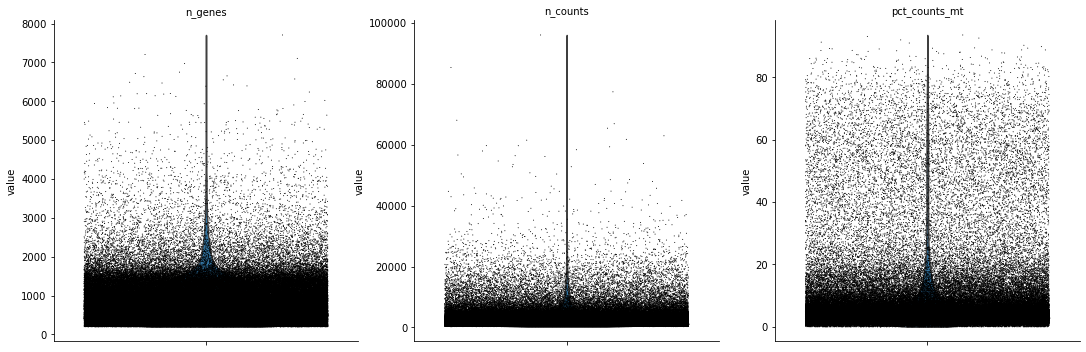

In [25]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'pct_counts_mt'],jitter=0.4, multi_panel=True)


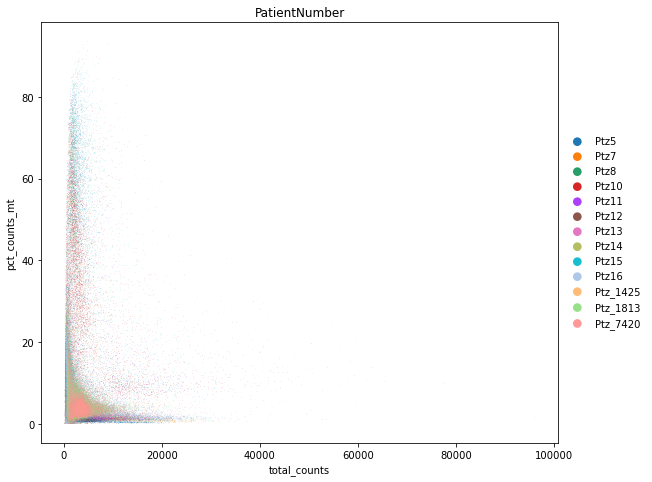

In [26]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', color="PatientNumber")

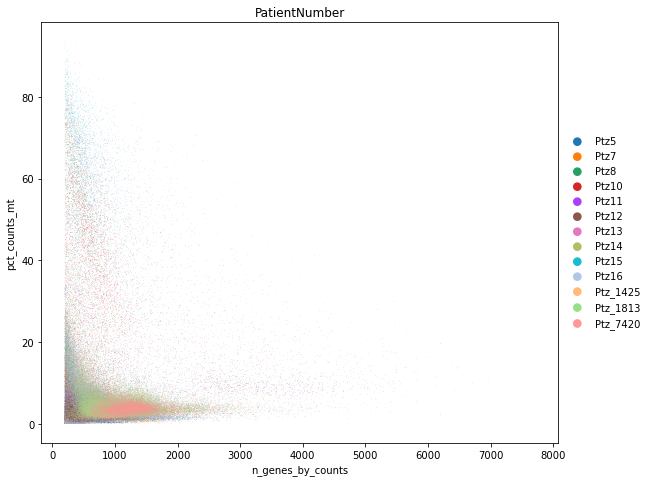

In [27]:
sc.pl.scatter(adata, x='n_genes_by_counts', y='pct_counts_mt', color="PatientNumber")

### Filter cells by n_genes

In [22]:
#keep = (adata.obs['n_genes_by_counts'] < 3000) & (adata.obs['n_genes_by_counts'] > 200)

In [23]:
#adata = adata[(keep), :]

normalizing counts per cell
    finished (0:00:01)


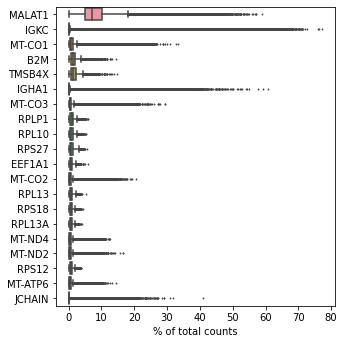

In [28]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [29]:
adata 

AnnData object with n_obs × n_vars = 173293 × 26109
    obs: 'CellId', 'CellFromTumor', 'PatientNumber', 'TumorType', 'TumorSite', 'CellType', 'dataset', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'PatientNumber_colors'

In [34]:
adata =  adata[adata.obs['pct_counts_mt'] < 10, :]

In [35]:
adata = adata[adata.obs['pct_counts_ribo'] > 5, :]

In [36]:
adata

View of AnnData object with n_obs × n_vars = 146798 × 26109
    obs: 'CellId', 'CellFromTumor', 'PatientNumber', 'TumorType', 'TumorSite', 'CellType', 'dataset', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'PatientNumber_colors'

In [37]:
print(adata.n_obs, adata.n_vars)
malat1 = adata.var_names.str.startswith('MALAT1')
# we need to redefine the mito_genes since they were first 
# calculated on the full object before removing low expressed genes.
mito_genes = adata.var_names.str.startswith('MT-')
hb_genes = adata.var_names.str.contains('^HB[^(P)]')
ribo_genes = adata.var_names.str.startswith(("RPS","RPL"))

remove = np.add(mito_genes, malat1,ribo_genes)
remove = np.add(remove, hb_genes)
keep = np.invert(remove)

adata = adata[:,keep]

print(adata.n_obs, adata.n_vars)

146798 26109
146798 26084


In [38]:
adata.X.shape

(146798, 26084)

In [39]:
adata.raw = adata

In [40]:
adata.raw.shape

(146798, 26084)

In [41]:
annot = sc.queries.biomart_annotations(
        "hsapiens",
        ["external_gene_name", "start_position", "end_position", "chromosome_name","gene_biotype"],).set_index("external_gene_name")

In [42]:
annot = pd.merge(pd.DataFrame(adata.var_names),annot,left_on=0,right_on="external_gene_name",how="left")

In [43]:
annot['gene_biotype'].unique()

array([nan, 'lncRNA', 'protein_coding', 'transcribed_unitary_pseudogene',
       'snRNA', 'scaRNA', 'IG_V_pseudogene',
       'transcribed_unprocessed_pseudogene', 'scRNA', 'IG_V_gene',
       'IG_C_gene', 'IG_J_gene', 'transcribed_processed_pseudogene',
       'unprocessed_pseudogene', 'polymorphic_pseudogene', 'TR_C_gene',
       'TR_J_gene', 'TR_V_gene', 'TR_V_pseudogene', 'IG_C_pseudogene',
       'ribozyme', 'processed_pseudogene', 'TR_J_pseudogene', 'miRNA'],
      dtype=object)

In [44]:
annot= annot.drop_duplicates([0])

In [45]:
annot = annot.fillna("Not_available")

In [46]:
print(adata.n_obs, adata.n_vars)

146798 26084


In [47]:
adata.var['gene_biotype'] = annot.set_index(0)['gene_biotype']
protein_coding = annot[0].loc[annot['gene_biotype']=="protein_coding"].reset_index()
del protein_coding['index']
protein_gene_indicator = np.in1d(adata.var_names, protein_coding)
adata = adata[:, protein_gene_indicator]

In [48]:
print(adata.n_obs, adata.n_vars)

146798 16536


### Remove Doublets

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


Trying to set attribute `.obs` of view, copying.


Automatically set threshold at doublet score = 0.38
Detected doublet rate = 2.2%
Estimated detectable doublet fraction = 32.8%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 6.9%
Elapsed time: 383.8 seconds


3084

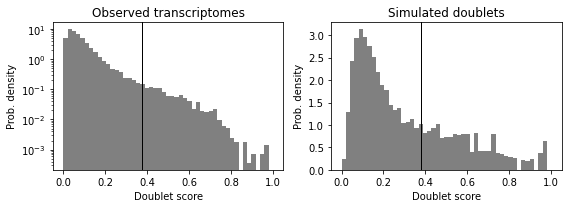

In [41]:
import scrublet as scr
scrub = scr.Scrublet(adata.raw.X)
adata.obs['doublet_scores'], adata.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()

sum(adata.obs['predicted_doublets'])

In [42]:
adata.obs['doublet_info'] = adata.obs["predicted_doublets"].astype(str)

In [43]:
adata = adata[adata.obs['doublet_info'] == 'False',:]
print(adata.shape)

(134054, 16507)


In [49]:
adata.write("/mnt/lugli/spuccio/SP028_Autoimmunity/Cariplo/IBD_counts/h5files/Concatenated_obj_qc.h5ad")

/home/spuccio/anaconda3/envs/singlecell/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.var` of view, copying.
... storing 'gene_biotype' as categorical
